# Logistic Regression Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
## Create the dataset
X, y = make_classification(n_samples=1000,n_features=10, n_classes=2, random_state=42)

In [4]:
X

array([[ 0.96479937, -0.06644898,  0.98676805, ..., -1.2101605 ,
        -0.62807677,  1.22727382],
       [-0.91651053, -0.56639459, -1.00861409, ..., -0.98453405,
         0.36389642,  0.20947008],
       [-0.10948373, -0.43277388, -0.4576493 , ..., -0.2463834 ,
        -1.05814521, -0.29737608],
       ...,
       [ 1.67463306,  1.75493307,  1.58615382, ...,  0.69272276,
        -1.50384972,  0.22526412],
       [-0.77860873, -0.83568901, -0.19484228, ..., -0.49735437,
         2.47213818,  0.86718741],
       [ 0.24845351, -1.0034389 ,  0.36046013, ...,  0.77323999,
         0.1857344 ,  1.41641179]])

In [5]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [6]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [8]:
# Model training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
 # penalty='l2',
 #    dual=False,
 #    tol=0.0001,
 #    C=1.0,
 #    fit_intercept=True,
 #    intercept_scaling=1,
 #    class_weight=None,
 #    random_state=None,
 #    solver='lbfgs',
 #    max_iter=100,
 #    multi_class='deprecated',
 #    verbose=0,
 #    warm_start=False,
 #    n_jobs=None,
 #    l1_ratio=None,
   

In [9]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [10]:
y_pred = logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [11]:
# logistic.predict_proba(X_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Hyperparameter Tuning and cross validation

In [14]:
model = LogisticRegression()
penalty=['l1','l2','elasticnet'] # penalty parameters
c_value = [100,10,1.0,0.1,0.01] # this will change based on the dataset
solver=['newton-cg','lbfgs','liblinear','sag', 'saga']

In [15]:
params = dict(penalty=penalty, C=c_value, solver=solver)

## Grid SearchCV -- for the hyper parameter tuning we will be using first technique which is called as grid search CV.

In [16]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [17]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=params,scoring='accuracy', cv=cv, n_jobs=-1)
# estimator,
#     param_grid,
#     scoring=None,
#     n_jobs=None,
#     refit=True,
#     cv=None,
#     verbose=0,
#     pre_dispatch='2*n_jobs',
#     error_score=nan,
#     return_train_score=False,

In [18]:
print(grid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')


In [19]:
print(grid.fit(X_train, y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

In [20]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [21]:
grid.best_score_

np.float64(0.8785714285714287)

In [22]:
y_pred = grid.predict(X_test)

In [23]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.8533333333333334
[[124  11]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



### Randomized SearchCV - So usually when we take all the combination it will obviously take more time. So in order to overcome this we basically use Randomizedsearchcv.

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
random_cv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy')

In [26]:
print(random_cv.fit(X_train,y_train))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _

In [27]:
random_cv.best_score_

np.float64(0.8785714285714287)

In [28]:
random_cv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 0.01}

In [29]:
y_pred = random_cv.predict(X_test)

In [30]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.8533333333333334
[[124  11]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



# Logistic Regression for multiclass classification problem
## Logistic OVR

In [31]:
## Create the dataset
X, y = make_classification(n_samples=1000,n_features=10, n_informative=3, n_classes=3, random_state=42)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [34]:
y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [35]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.68
[[79 16  8]
 [31 38 27]
 [ 3 11 87]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       103
           1       0.58      0.40      0.47        96
           2       0.71      0.86      0.78       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.68      0.66       300



## Logistic Regression for Imbalanced Dataset

In [36]:
# Genarate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [37]:
## imbalanced dataset
X,y = make_classification(
    n_samples=10000, 
    n_features=2,
    n_clusters_per_class=1, 
    n_redundant=0,
    weights=[0.99], 
    random_state=10
)

In [38]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [39]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

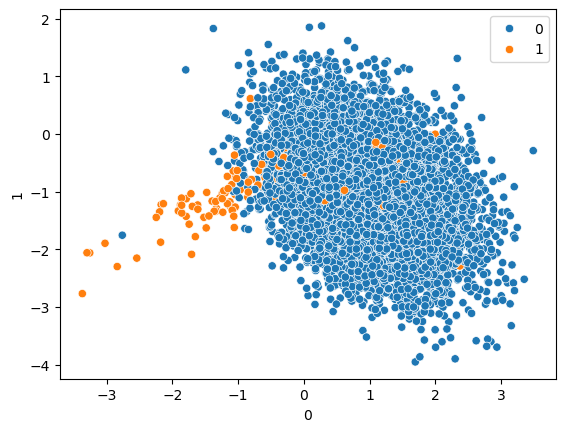

In [40]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.show()

In [41]:
## Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
## hyperparameter tuning
model = LogisticRegression()
penalty=['l1','l2','elasticnet'] # penalty parameters
c_value = [100,10,1.0,0.1,0.01] # this will change based on the dataset
solver=['newton-cg','lbfgs','liblinear','sag', 'saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [43]:
params = dict(penalty=penalty, C=c_value, solver=solver, class_weight=class_weight)

In [44]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv)

In [46]:
print(grid.fit(X_train, y_train))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 138

In [47]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [48]:
y_pred = grid.predict(X_test)

In [49]:
score = accuracy_score(y_pred, y_test)
print(score)
cm = confusion_matrix(y_pred, y_test)
print(cm)
print(classification_report(y_pred, y_test))

0.9896
[[2465   26]
 [   0    9]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2491
           1       0.26      1.00      0.41         9

    accuracy                           0.99      2500
   macro avg       0.63      0.99      0.70      2500
weighted avg       1.00      0.99      0.99      2500



## Logistic Regression with ROC curve and ROC AUC score

In [53]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [52]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [55]:
## Split the dataset into train and test
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [57]:
# Created a summy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [58]:
# Lets Create Basic Logistic Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
## prediction based probability
model_prob = model.predict_proba(X_test)

In [62]:
# Lets focus on the positive outcome
model_prob = model_prob[:,1]

In [65]:
model_prob

array([9.99041225e-01, 9.68866009e-02, 4.89372036e-01, 8.10046974e-01,
       1.12426807e-01, 4.39872005e-01, 8.29460814e-01, 7.13822440e-01,
       8.87707883e-01, 8.67973855e-01, 5.43854787e-04, 8.31200361e-01,
       1.91030219e-01, 5.39053079e-01, 7.28060254e-01, 8.23507048e-01,
       9.38587042e-01, 6.38367304e-01, 1.10159811e-01, 2.41034347e-01,
       1.15857322e-02, 4.90154702e-01, 8.88085107e-01, 9.97948102e-01,
       1.36945498e-01, 1.32643249e-02, 6.45087847e-01, 9.69507009e-01,
       3.99070556e-02, 2.38152731e-02, 3.69213417e-01, 3.40314906e-02,
       2.29858043e-01, 9.57101721e-01, 5.44958479e-01, 6.56791269e-01,
       1.52123558e-02, 2.93410161e-02, 7.80393330e-01, 2.99088014e-02,
       9.28398422e-01, 8.43395917e-01, 1.60117892e-02, 5.78395703e-04,
       6.61496895e-02, 6.69762422e-02, 9.97948178e-01, 6.55755704e-01,
       8.94036983e-01, 6.07000680e-02, 2.10340754e-02, 3.23954283e-02,
       1.03560315e-01, 5.44021349e-02, 5.64730236e-01, 9.87033757e-01,
      

In [64]:
## Lets calculate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [80]:
## Calculate ROC curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [81]:
thresholds

array([           inf, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

In [75]:
dummy_fpr.shape, model_tpr.shape

((2,), (62,))

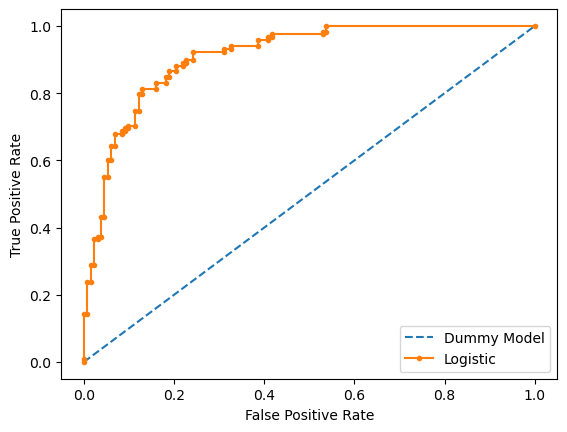

In [79]:
## plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label="Dummy Model")# dummy model
pyplot.plot(model_fpr, model_tpr, marker='.', label="Logistic") # this we have created
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
plt.show()

When we are seeing this ROC curve, right when we are applying this ROC curve and we give our Y test

and the probability value, the third parameter that is put is blank.

But this third parameter will give us the threshold values.

And based on this threshold values it will be testing our model.

And it will be drawing the curve.

Right.

So whatever points that you basically see over here this all points, this all points are based on some

threshold values.

So based on some threshold value we calculate our false positive rate true positive rate.

And that basically is pointed over here.

## Coming to the conclusion is important

C:\Users\Atharva koli\AppData\Local\Temp\ipykernel_4984\1676251112.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


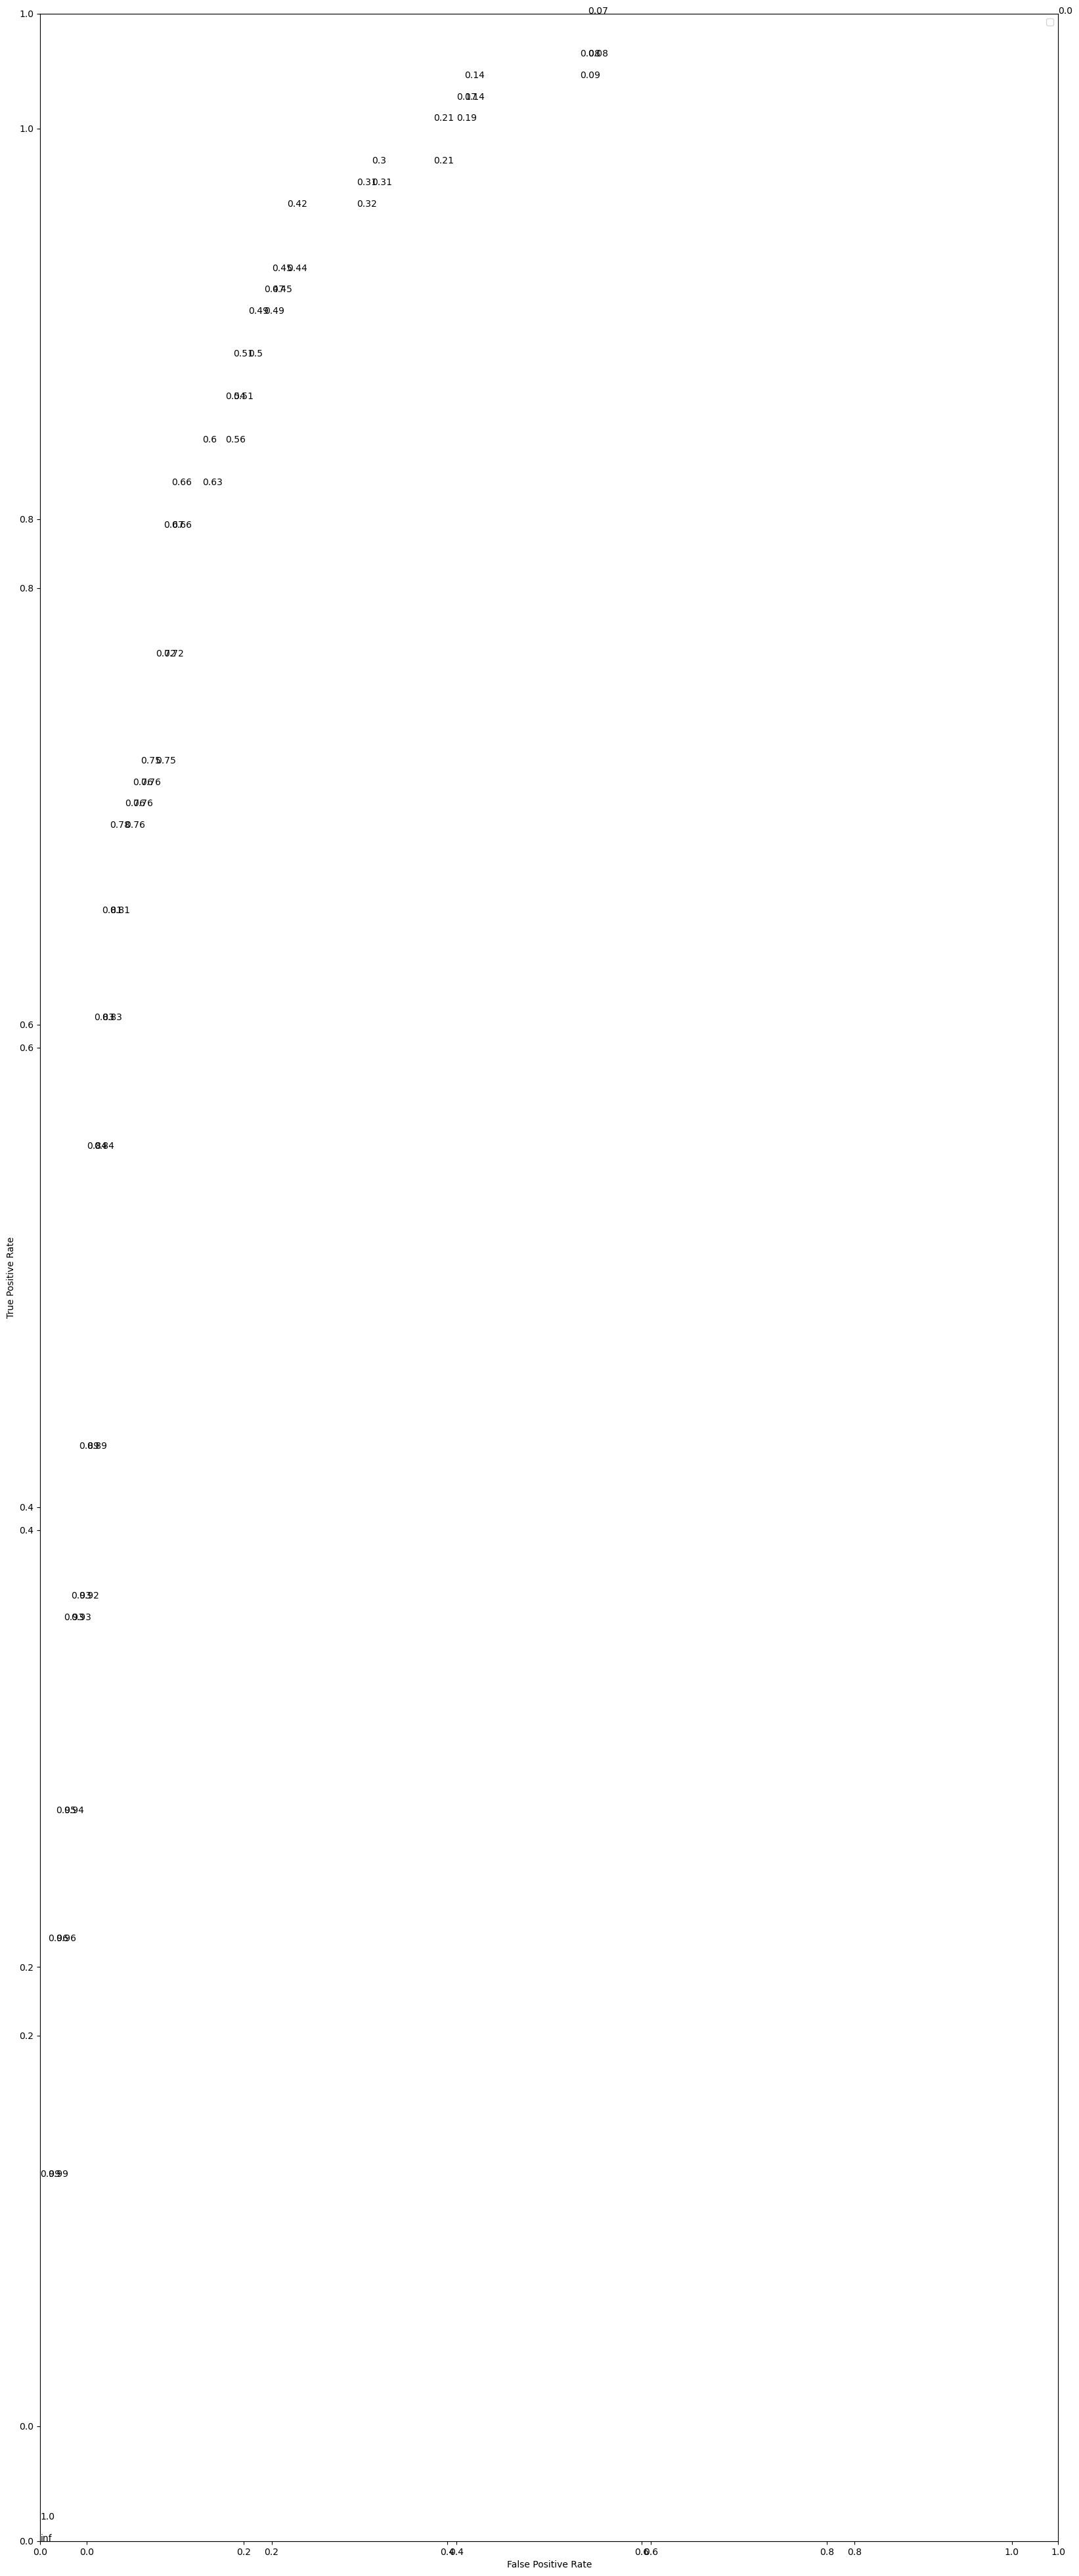

In [86]:
## plot the roc curve for the model
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label="Dummy Model")# dummy model
pyplot.plot(model_fpr, model_tpr, marker='.', label="Logistic") # this we have created
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
plt.show()